<a href="https://colab.research.google.com/github/brenolucas00/exerc-ciosawariwebscrapping/blob/main/Regress%C3%A3o_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/houses.csv')
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


df.shape[0] = linhas
df.shape[1] = colunas

In [ ]:
print("O df contém {} amostras e {} variaveis".format(df.shape[0],df.shape[1]))

O df contém 506 amostras e 13 variaveis


In [ ]:
df[df.isnull()].count()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


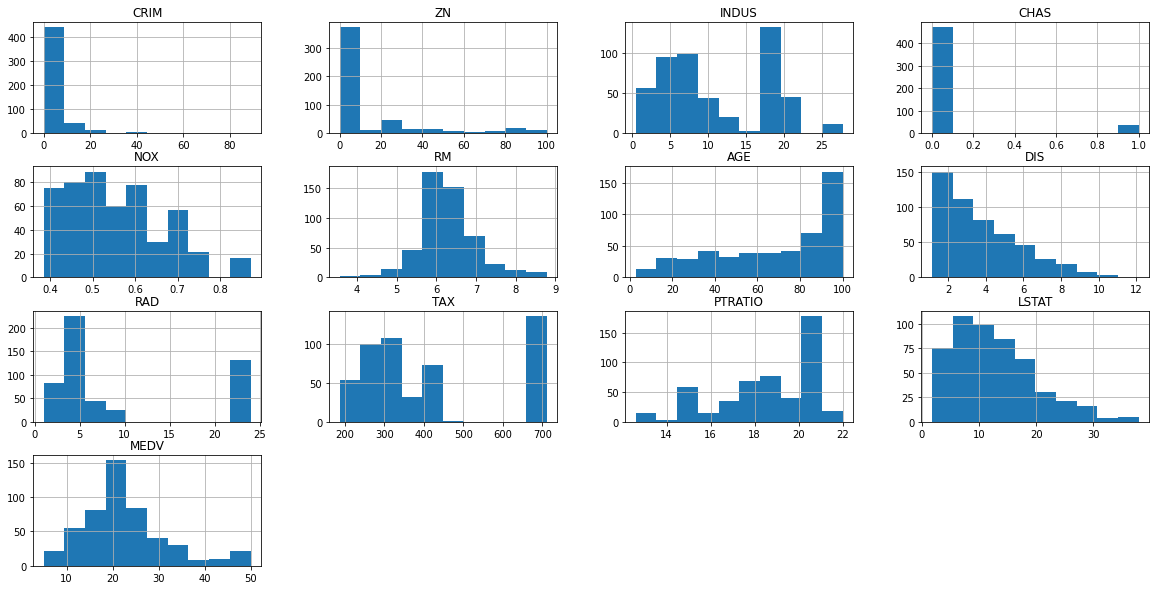

In [ ]:
df.hist(figsize= (20,10))
df.describe()

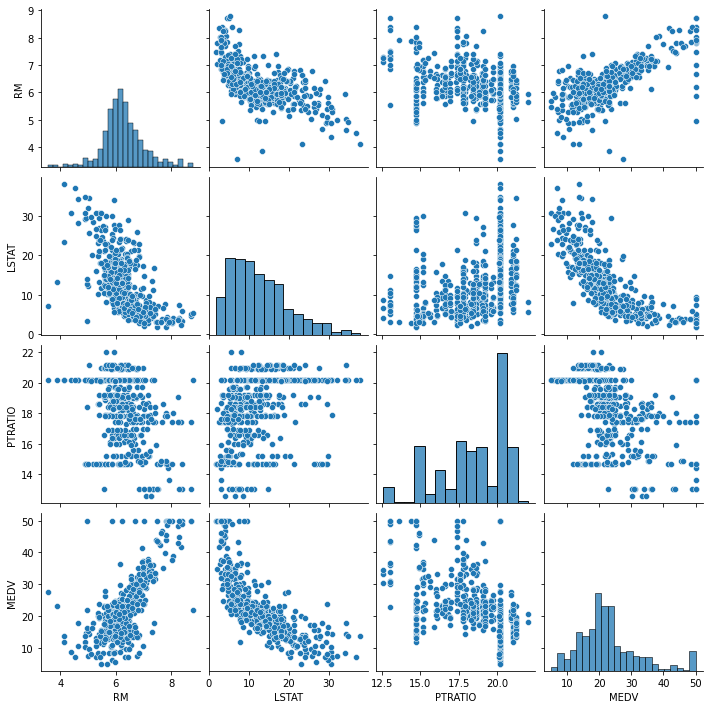

In [ ]:
sns.pairplot(df[[ 'RM', 'LSTAT', 'PTRATIO', 'MEDV']])

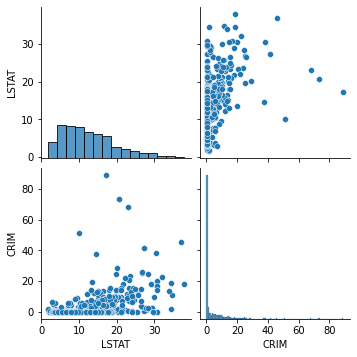

In [ ]:
sns.pairplot(df[['LSTAT', 'CRIM'	]])

# A maior taxa de criminalidade fica entre os 15% e 17% mais pobres.


             CRIM        ZN     INDUS  CHAS       NOX        RM       AGE  \
CRIM     1.000000       NaN       NaN   NaN       NaN       NaN       NaN   
ZN            NaN  1.000000 -0.533828   NaN -0.516604       NaN -0.569537   
INDUS         NaN -0.533828  1.000000   NaN  0.763651       NaN  0.644779   
CHAS          NaN       NaN       NaN   1.0       NaN       NaN       NaN   
NOX           NaN -0.516604  0.763651   NaN  1.000000       NaN  0.731470   
RM            NaN       NaN       NaN   NaN       NaN  1.000000       NaN   
AGE           NaN -0.569537  0.644779   NaN  0.731470       NaN  1.000000   
DIS           NaN  0.664408 -0.708027   NaN -0.769230       NaN -0.747881   
RAD      0.625505       NaN  0.595129   NaN  0.611441       NaN       NaN   
TAX      0.582764       NaN  0.720760   NaN  0.668023       NaN  0.506456   
PTRATIO       NaN       NaN       NaN   NaN       NaN       NaN       NaN   
LSTAT         NaN       NaN  0.603800   NaN  0.590879 -0.613808  0.602339   

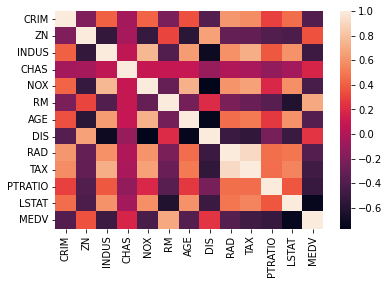

In [46]:
corr = df.corr()
print(corr[(corr > 0.5) | (corr < -0.5)])
sns.heatmap(corr)

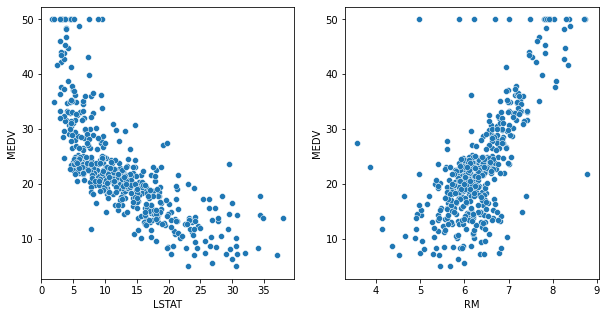

In [49]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
sns.scatterplot(ax=axes[0], x='LSTAT',y='MEDV',data=df)
sns.scatterplot(ax=axes[1], x='RM',y='MEDV',data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


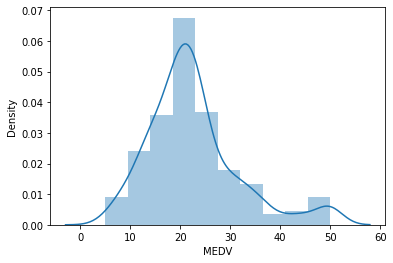

In [58]:
sns.distplot(df.MEDV,bins=10)

In [60]:
train, test = train_test_split(df,train_size=0.8)
X_train, X_test, y_train, y_test = train_test_split(df[['LSTAT','RM']], df['MEDV'], train_size=0.8, random_state=1)


In [61]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [62]:
reg.score(X_train, y_train)

0.6251836356449056

In [63]:
y_pred = reg.predict(X_test)
r2_score(y_test,y_pred)

0.6753556251471677